In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [4]:
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_p1_var  mean_3m_price_p2_var  mean_3m_price_p3_var  \
0              0.131756              0.092638              0.036909   
1              0.147600              0.000000              0.000000   
2              0.167798              0.088409              0.000000   
3              0.148586              0.000000              0.000000   
4              0.119906              0.101673              0.073719   

   mean_3m_price_p1_fix  mean_3m_price_p2_fix  mean_3m_price_p3_fix  \
0             42.497907             12.218665              8.145777   
1             44.444710              0.000000              0.000000   
2             44.444710              0.000000              0.000000   
3             44.444710              0.000000              0.000000   
4             40.728885             24.437330             16.291555   

   mean_3m_price_p1 mean_3m_price_p2  mean_3m_price_p3  churn  
0         42.629663        12.311304          8.182687      1  
1         44.592310         0.000000          0.000000      0  
2         44.612508         0.088409          0.000000      0  
3         44.593296         0.000000          0.000000      0  
4         40.848791        24.539003         16.365274      0  

[5 rows x 54 columns]

In [5]:
df.describe()

Unnamed: 0      cons_12m  cons_gas_12m  cons_last_month  \
count  14605.000000  1.460500e+04  1.460500e+04     14605.000000   
mean    7302.000000  1.592303e+05  2.809108e+04     16091.371448   
std     4216.244676  5.734836e+05  1.629786e+05     64366.262314   
min        0.000000  0.000000e+00  0.000000e+00         0.000000   
25%     3651.000000  5.674000e+03  0.000000e+00         0.000000   
50%     7302.000000  1.411600e+04  0.000000e+00       793.000000   
75%    10953.000000  4.076400e+04  0.000000e+00      3383.000000   
max    14604.000000  6.207104e+06  4.154590e+06    771203.000000   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
count       14605.000000        14605.000000              14605.000000   
mean         1868.638618         1399.858747                  0.966450   
std          2387.651549         3247.876793                  5.108355   
min             0.000000            0.000000                  0.000000   
25%           494.980000            0.000000                  0.000000   
50%          1112.610000          314.000000                  0.000000   
75%          2402.270000         1746.000000                  0.000000   
max         82902.830000       175375.000000                 30.000000   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
count             14605.000000                    14605.000000   
mean                 63.090448                        0.137282   
std                  66.166636                        0.024623   
min                   0.000000                        0.000000   
25%                  16.180000                        0.116340   
50%                  18.800000                        0.143166   
75%                 131.030000                        0.146348   
max                 599.310000                        0.273963   

       forecast_price_energy_peak  ...  mean_3m_price_p1_var  \
count                14605.000000  ...          14605.000000   
mean                     0.050488  ...              0.139312   
std                      0.049037  ...              0.024318   
min                      0.000000  ...              0.000000   
25%                      0.000000  ...              0.119405   
50%                      0.084138  ...              0.144757   
75%                      0.098837  ...              0.147983   
max                      0.195975  ...              0.276238   

       mean_3m_price_p2_var  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
count          14605.000000          14605.000000          14605.000000   
mean               0.051310              0.028568             43.058161   
std                0.049501              0.036376              4.668200   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000             40.728885   
50%                0.084305              0.000000             44.355820   
75%                0.100491              0.073719             44.444710   
max                0.196029              0.103502             59.444710   

       mean_3m_price_p2_fix  mean_3m_price_p3_fix  mean_3m_price_p1  \
count          14605.000000          14605.000000      14605.000000   
mean               9.483665              6.115566         43.197473   
std               12.139506              7.830408          4.683855   
min                0.000000              0.000000          0.000000   
25%                0.000000              0.000000         40.848595   
50%                0.000000              0.000000         44.502379   
75%               24.437330             16.291555         44.592310   
max               36.490689             17.291555         59.720948   

       mean_3m_price_p2  mean_3m_price_p3         churn  
count      14605.000000      14605.000000  14605.000000  
mean           9.534975          6.144134      0.097159  
std           12.179014          7.866460      0.296184  
min      

# Fetaure engineering

### Difference between  prices in December and preceding January 


Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [6]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [7]:
# Group off-peak, peak and mid-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean','price_peak_var':'mean',
                                                                 'price_peak_fix':'mean','price_mid_peak_var':'mean','price_mid_peak_fix':'mean'}).reset_index()

monthly_price_by_id.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  price_peak_var  price_peak_fix  price_mid_peak_var  \
0           40.565969        0.103975       24.339581            0.070232   
1           40.565969        0.103975       24.339581            0.070232   
2           40.728885        0.105842       24.437330            0.073773   
3           40.728885        0.105842       24.437330            0.073773   
4           40.728885        0.105842       24.437330            0.073773   

   price_mid_peak_fix  
0           16.226389  
1           16.226389  
2           16.291555  
3           16.291555  
4           16.291555

In [8]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2','price_peak_var':'dec_3',
                                           'price_peak_fix':'dec_4','price_mid_peak_var':'dec_5','price_mid_peak_fix':'dec_6'}),
                jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff['peak_diff_dec_january_energy'] = diff['dec_3'] - diff['price_peak_var']
diff['peak_diff_dec_january_power'] = diff['dec_4'] - diff['price_peak_fix']
diff['midpeak_diff_dec_january_energy'] = diff['dec_5'] - diff['price_mid_peak_var']
diff['midpeak_diff_dec_january_power'] = diff['dec_6'] - diff['price_mid_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power','peak_diff_dec_january_energy',
            'peak_diff_dec_january_power','midpeak_diff_dec_january_energy','midpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  peak_diff_dec_january_energy  \
0                        0.162916                     -0.002302   
1                        0.177779                      0.000000   
2                        1.500000                      0.000000   
3                        0.162916                     -0.005120   
4                       -0.000001                      0.000000   

   peak_diff_dec_january_power  midpeak_diff_dec_january_energy  \
0                     0.097749                         0.003487   
1                     0.000000                         0.000000   
2                     0.000000                         0.000000   
3                     0.097749                         0.000763   
4                     0.000000                         0.000000   

   midpeak_diff_dec_january_power  
0                        0.065166  
1                        0.000000  
2                        0.000000  
3                        0.065166  
4                        0.000000

 The dec-jan feature may reveal macro patterns that occur over an entire year.

In [9]:
#Merging the dataframes
df = pd.merge(df, diff, on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  mean_3m_price_p1  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...         42.629663   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...         44.592310   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...         44.612508   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...         44.593296   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...         40.848791   

   mean_3m_price_p2  mean_3m_price_p3  churn  offpeak_diff_dec_january_energy  \
0         12.311304          8.182687      1                         0.020057   
1          0.000000          0.000000      0                        -0.003767   
2          0.088409          0.000000      0                        -0.004670   
3          0.000000          0.000000      0                        -0.004547   
4         24.539003         16.365274      0                        -0.006192   

   offpeak_diff_dec_january_power  peak_diff_dec_january_energy  \
0                        3.700961                     -0.017912   
1                        0.177779                      0.000000   
2                        0.177779                      0.000528   
3                        0.177779                      0.000000   
4                        0.162916                     -0.002302   

  peak_diff_dec_january_power  midpeak_diff_dec_january_energy  \
0                  -24.339581                        -0.071536   
1                    0.000000                         0.000000   
2                    0.000000                         0.000000   
3                    0.000000                         0.000000   
4                    0.097749                         0.003487   

   midpeak_diff_dec_january_power  
0                      -16.226389  
1                        0.000000  
2                        0.000000  
3                        0.000000  
4                        0.065166  

[5 rows x 60 columns]

### Average price changes across periods

In [10]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [11]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [12]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   peak_diff_dec_january_energy  peak_diff_dec_january_power  \
0                     -0.017912                   -24.339581   
1                      0.000000                     0.000000   
2                      0.000528                     0.000000   
3                      0.000000                     0.000000   
4                     -0.002302                     0.097749   

   midpeak_diff_dec_january_energy  midpeak_diff_dec_january_power  \
0                        -0.071536                      -16.226389   
1                         0.000000                        0.000000   
2                         0.000000                        0.000000   
3                         0.000000                        0.000000   
4                         0.003487                        0.065166   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

   off_peak_mid_peak_var_mean_diff off_peak_peak_fix_mean_diff  \
0                         0.058257                   18.590255   
1                         0.149609                   44.311375   
2                         0.170512                   44.385450   
3                         0.151210                   44.400265   
4                         0.051309                   16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 66 columns]

This feature may be useful because it adds more granularity to the existing feature(i.e.,difference between prices in December and preceding January). Instead of looking at differences across an entire year, we have now created features that look at mean average price differences across different time periods (off_peak, peak, mid_peak). 

### Tenure-How long a company has been a client of PowerCo.

In [13]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [14]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn.

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

### Transforming dates into months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [15]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [16]:
from datetime import datetime
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

- Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.
- A client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the months_activ feature.
- months_to_end will be an interesting feature because it may reveal patterns and behaviours about timing of churn.
- months_modif_prod will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.
- Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe months_renewal will be a good feature to include.

In [17]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  ...  peak_mid_peak_var_mean_diff  \
0                     1.78  ...                     0.034219   
1                    16.27  ...                     0.007124   
2                    38.72  ...                     0.088421   
3                    19.83  ...                     0.000000   
4                   131.73  ...                     0.030773   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

  peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  tenure  \
0                    7.450670                        26.040925       3   
1                    0.000000                        44.311375       7   
2                    0.000000                        44.385450       6   
3                    0.000000                        44.400265       6   
4                    8.137629                        24.412893       6   

   months_activ  months_to_end  months_modif_prod  months_renewal  
0            30              5                  2               6  
1            76              7                 76               4  
2            68              3                 68               8  
3            69              2                 69               9  
4            71              2                 71               9  

[5 rows x 67 columns]

# Preparing for modelling

### Categorical columns 

In [18]:
catdf = df.select_dtypes(include='object')
catdf.head()

id                     channel_sales has_gas  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua       t   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING       f   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua       f   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema       f   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING       f   

                          origin_up  
0  lxidpiddsbxsbosboudacockeimpuepw  
1  kamkkxfxxuwbdslkwifmmcsiusiuosws  
2  kamkkxfxxuwbdslkwifmmcsiusiuosws  
3  kamkkxfxxuwbdslkwifmmcsiusiuosws  
4  kamkkxfxxuwbdslkwifmmcsiusiuosws

In [19]:
catdf.nunique()

id               14605
channel_sales        8
has_gas              2
origin_up            6
dtype: int64

In [20]:
#dropping id column
df=df.drop('id',axis=1)
df.head()

Unnamed: 0                     channel_sales  cons_12m  cons_gas_12m  \
0           0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946   
1           1                           MISSING      4660             0   
2           2  foosdfpfkusacimwkcsosbicdxkicaua       544             0   
3           3  lmkebamcaaclubfxadlmueccxoimlema      1584             0   
4           4                           MISSING      4425             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0               0.00                   0   
1                0             189.95                   0   
2                0              47.96                   0   
3                0             240.04                   0   
4              526             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  peak_mid_peak_var_mean_diff  \
0                        0.114481  ...                     0.034219   
1                        0.145711  ...                     0.007124   
2                        0.165794  ...                     0.088421   
3                        0.146694  ...                     0.000000   
4                        0.116900  ...                     0.030773   

   off_peak_mid_peak_var_mean_diff off_peak_peak_fix_mean_diff  \
0                         0.058257                   18.590255   
1                         0.149609                   44.311375   
2                         0.170512                   44.385450   
3                         0.151210                   44.400265   
4                         0.051309                   16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  tenure  \
0                     7.450670                        26.040925       3   
1                     0.000000                        44.311375       7   
2                     0.000000                        44.385450       6   
3                     0.000000                        44.400265       6   
4                     8.137629                        24.412893       6   

   months_activ  months_to_end  months_modif_prod months_renewal  
0            30              5                  2              6  
1            76              7                 76              4  
2            68              3                 68              8  
3            69              2                 69              9  
4            71              2                 71              9  

[5 rows x 66 columns]

In [21]:
catdf = df.select_dtypes(include='object')
catdf.head()

channel_sales has_gas                         origin_up
0  foosdfpfkusacimwkcsosbicdxkicaua       t  lxidpiddsbxsbosboudacockeimpuepw
1                           MISSING       f  kamkkxfxxuwbdslkwifmmcsiusiuosws
2  foosdfpfkusacimwkcsosbicdxkicaua       f  kamkkxfxxuwbdslkwifmmcsiusiuosws
3  lmkebamcaaclubfxadlmueccxoimlema       f  kamkkxfxxuwbdslkwifmmcsiusiuosws
4                           MISSING       f  kamkkxfxxuwbdslkwifmmcsiusiuosws

In [22]:
for column in catdf:
    print(catdf[column].value_counts()) 

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64
f    11955
t     2650
Name: has_gas, dtype: int64
lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64


In [23]:
#channel sales
#We have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. 
#Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all.
#For this reason, we will drop these 3 dummy variables.
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0           0         0         54946                0               0.00   
1           1      4660             0                0             189.95   
2           2       544             0                0              47.96   
3           3      1584             0                0             240.04   
4           4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  ...  tenure  \
0                        0.114481                    0.098142  ...       3   
1                        0.145711                    0.000000  ...       7   
2                        0.165794                    0.087899  ...       6   
3                        0.146694                    0.000000  ...       6   
4                        0.116900                    0.100015  ...       6   

  months_activ  months_to_end  months_modif_prod  months_renewal  \
0           30              5                  2               6   
1           76              7                 76               4   
2           68              3                 68               8   
3           69              2                 69               9   
4           71              2                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 70 columns]

In [24]:
#has_gas
#tansform this column from being categorical to being a binary flag
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.head()

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0           0         0         54946                0               0.00   
1           1      4660             0                0             189.95   
2           2       544             0                0              47.96   
3           3      1584             0                0             240.04   
4           4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  ...  tenure  \
0                        0.114481                    0.098142  ...       3   
1                        0.145711                    0.000000  ...       7   
2                        0.165794                    0.087899  ...       6   
3                        0.146694                    0.000000  ...       6   
4                        0.116900                    0.100015  ...       6   

   months_activ  months_to_end  months_modif_prod  months_renewal  \
0            30              5                  2               6   
1            76              7                 76               4   
2            68              3                 68               8   
3            69              2                 69               9   
4            71              2                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                         0  
1                                         0  
2                                         0  
3                                         0  
4                                         0  

[5 rows x 70 columns]

In [25]:
#origin_up
#Similar to channel_sales the last 3 categories in the output above show very low frequency,
#so we will remove these from the features after creating dummy variables.
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

Unnamed: 0  cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0           0         0         54946                0               0.00   
1           1      4660             0                0             189.95   
2           2       544             0                0              47.96   
3           3      1584             0                0             240.04   
4           4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  ...  \
0                        0.114481                    0.098142  ...   
1                        0.145711                    0.000000  ...   
2                        0.165794                    0.087899  ...   
3                        0.146694                    0.000000  ...   
4                        0.116900                    0.100015  ...   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                 76               4                1   
2                 68               8                0   
3                 69               9                0   
4                 71               9                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 72 columns]

# Numerical columns

In [26]:
#during exploration, we saw that these columns were skewed
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460500e+04  1.460500e+04     14605.000000       14605.000000   
mean   1.592303e+05  2.809108e+04     16091.371448        1868.638618   
std    5.734836e+05  1.629786e+05     64366.262314        2387.651549   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411600e+04  0.000000e+00       793.000000        1112.610000   
75%    4.076400e+04  0.000000e+00      3383.000000        2402.270000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean          1399.858747                  0.966450                63.090448   
std           3247.876793                  5.108355                66.166636   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.800000   
75%           1746.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [27]:
#We will use the 'Logarithm' transformation for the positively skewed features.
#We cannot apply log to a value of 0, so we will add a constant of 1 to all the values
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [28]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14605.000000  14605.000000     14605.000000       14605.000000   
mean       4.223945      0.778978         2.264801           2.962162   
std        0.884545      1.716828         1.769266           0.683612   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.753966      0.000000         0.000000           2.695464   
50%        4.149742      0.000000         2.899821           3.046733   
75%        4.610287      0.000000         3.529430           3.380803   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean             1.784733                  0.966450                 1.517233   
std              1.584972                  5.108355                 0.571489   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296665   
75%              3.242293                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [29]:
#checking for null values
df.isnull().sum()

Unnamed: 0                                    0
cons_12m                                      0
cons_gas_12m                                  0
cons_last_month                               0
forecast_cons_12m                             0
                                             ..
channel_lmkebamcaaclubfxadlmueccxoimlema      0
channel_usilxuppasemubllopkaafesmlibmsdf      0
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws    0
origin_up_ldkssxwpmemidmecebumciepifcamkci    0
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0
Length: 72, dtype: int64

In [30]:
#drop 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)
df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  3.668479      0.000000         0.000000           2.280920   
2  2.736397      0.000000         0.000000           1.689841   
3  3.200029      0.000000         0.000000           2.382089   
4  3.646011      0.000000         2.721811           2.650065   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            0.000000                       0.0                 0.444045   
1            0.000000                       0.0                 1.237292   
2            0.000000                       0.0                 1.599009   
3            0.000000                       0.0                 1.318689   
4            2.721811                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  2               6   
1                    44.311378  ...                 76               4   
2                    44.311378  ...                 68               8   
3                    44.311378  ...                 69               9   
4                    40.606701  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 71 columns]

### VIF to treat multicollinearity

In [31]:
correlation = df.corr()

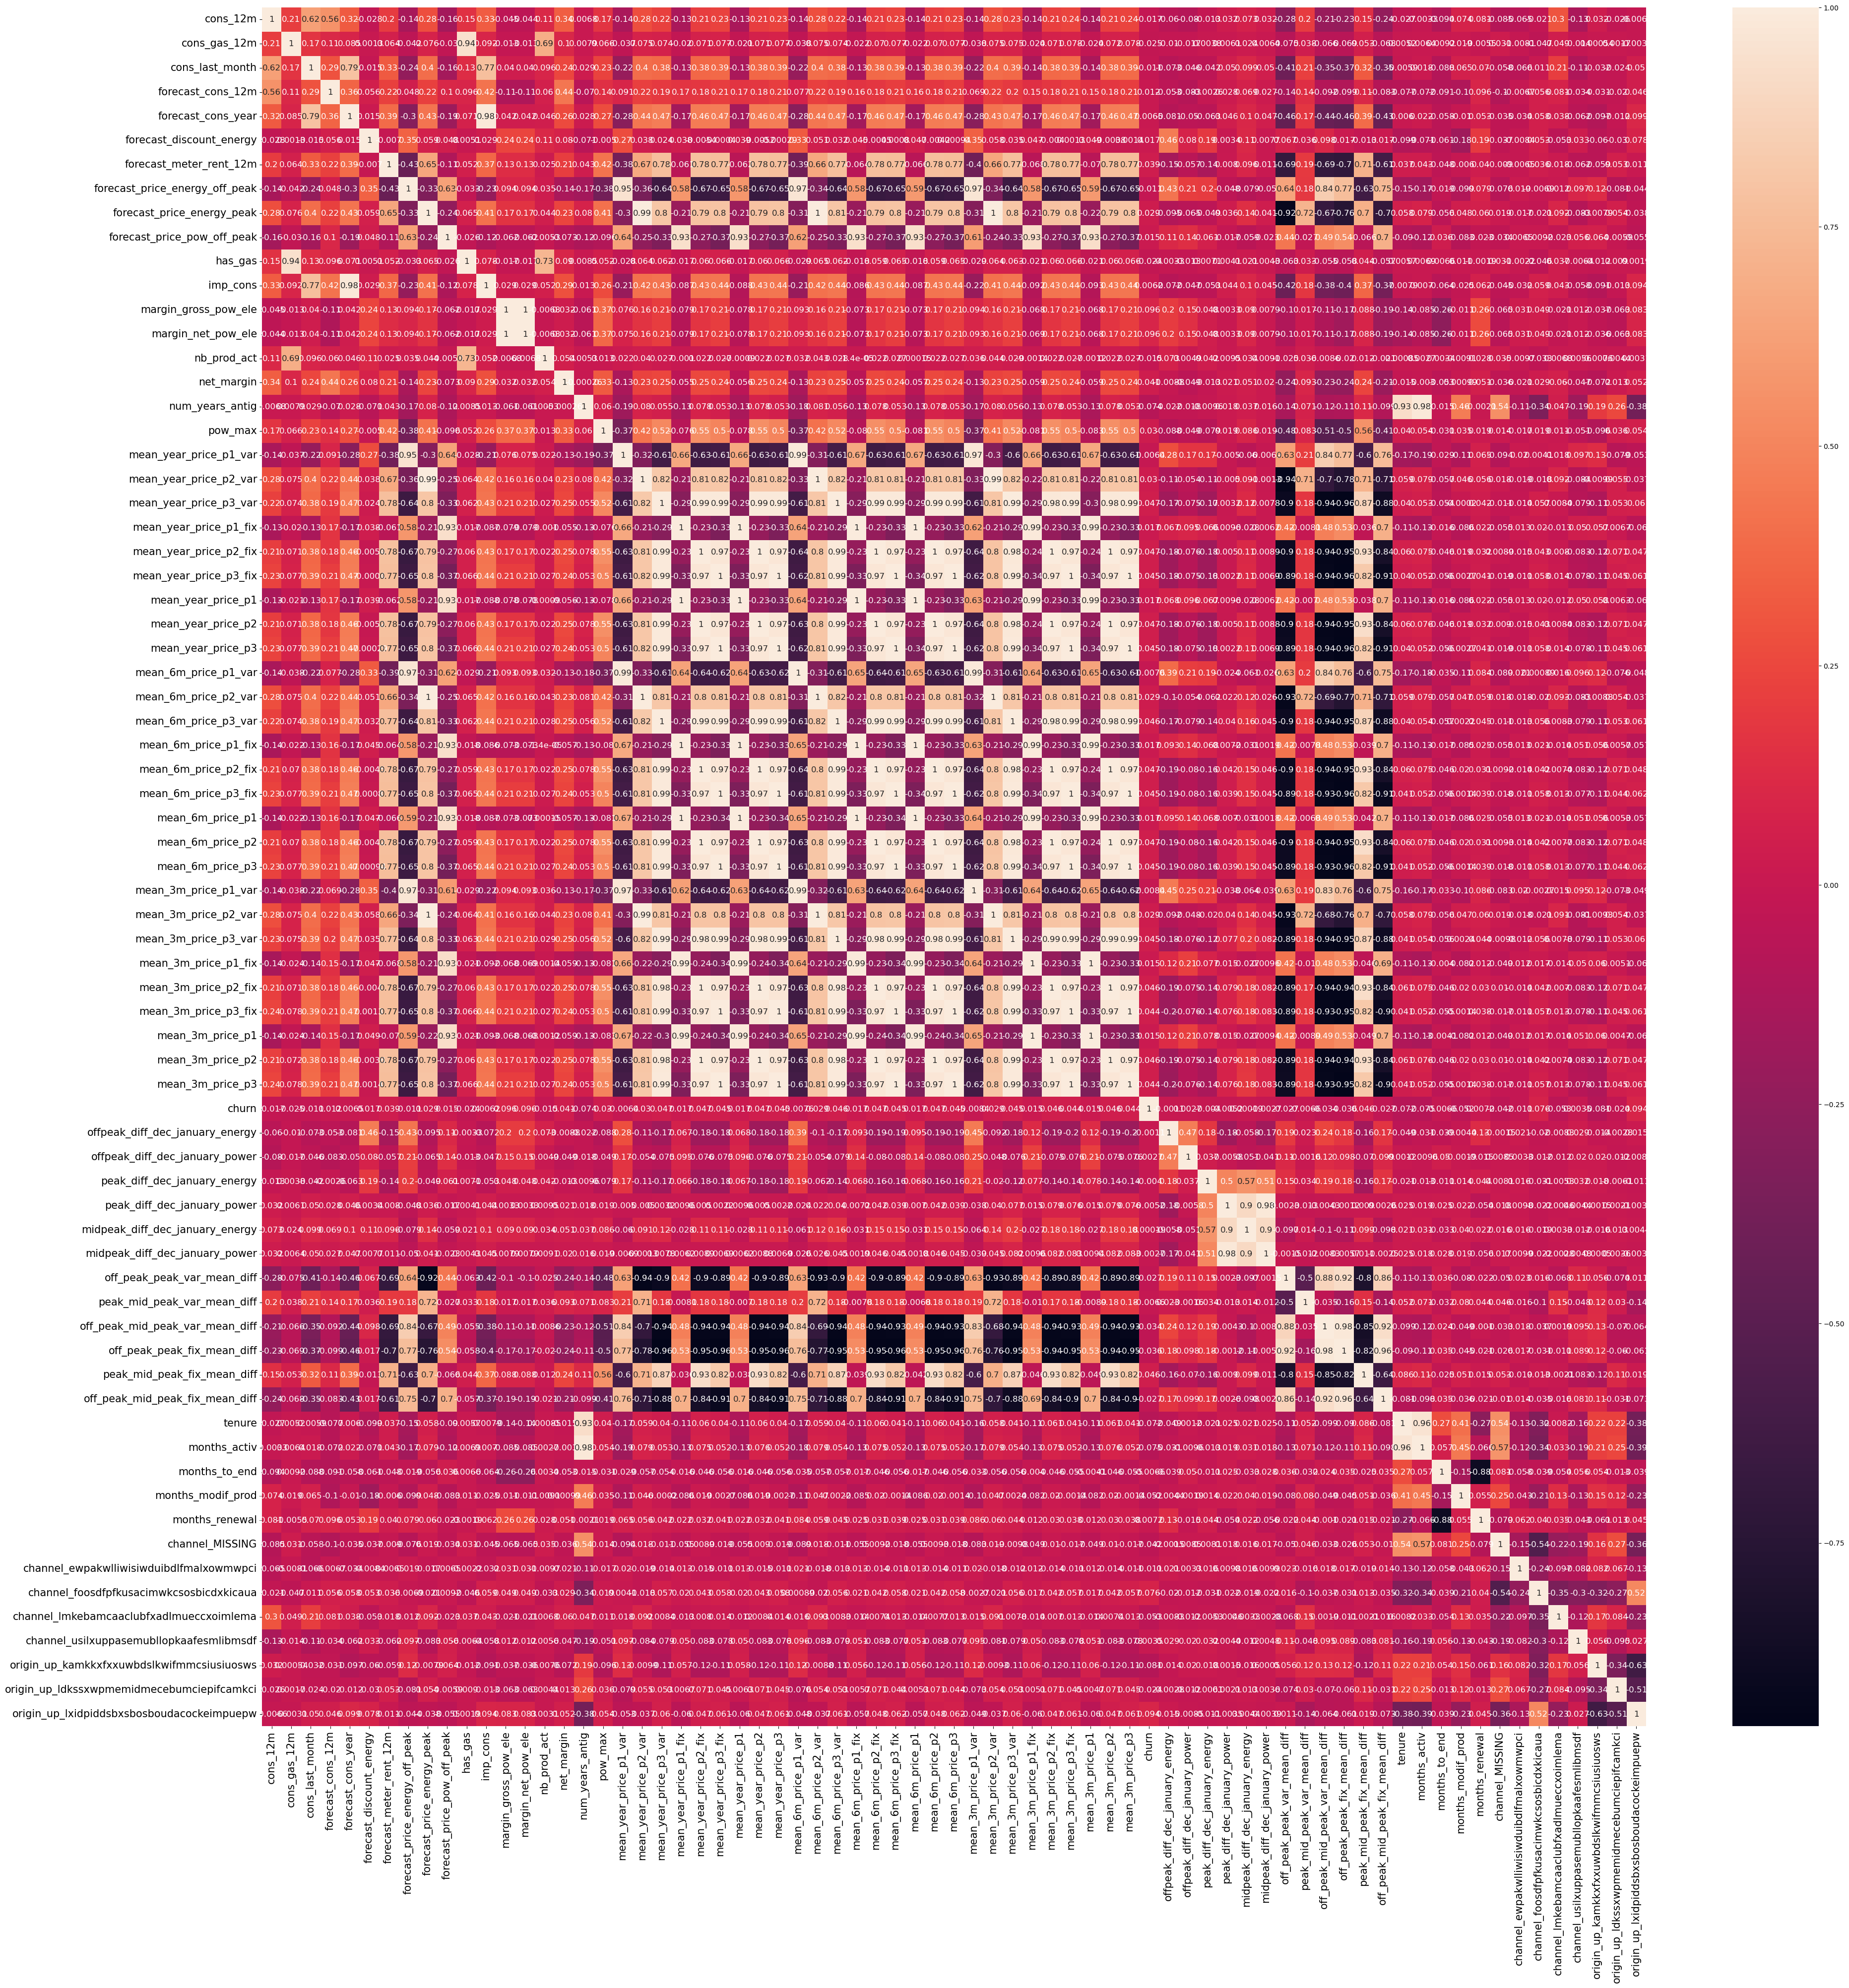

In [32]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
columnsforvif=df.drop('churn',axis=1)

In [34]:
columnsforvif.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix',
       'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2',
       'mean_6m_price_p3', 'mean_3m_price_p1_var', 'mean_3m_price_p2_var',
       'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 'mean_3m_pri

In [35]:
vif_data = pd.DataFrame()
vif_data["features"] = columnsforvif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(columnsforvif.values, i)
                          for i in range(len(columnsforvif.columns))]

print(vif_data.sort_values(by='VIF',ascending=False))

C:\Users\nidhi\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                          features       VIF
35                mean_6m_price_p3       inf
23          mean_year_price_p3_fix       inf
25              mean_year_price_p2       inf
26              mean_year_price_p3       inf
27            mean_6m_price_p1_var       inf
..                             ...       ...
47    peak_diff_dec_january_energy  4.216276
46  offpeak_diff_dec_january_power  4.119629
60               months_modif_prod  3.523143
5         forecast_discount_energy  2.941954
15                      net_margin  2.201532

[70 rows x 2 columns]


In [36]:
pd.set_option('display.max_rows', None)
vif_data.sort_values(by='VIF',ascending=False)

features           VIF
35                            mean_6m_price_p3           inf
23                      mean_year_price_p3_fix           inf
25                          mean_year_price_p2           inf
26                          mean_year_price_p3           inf
27                        mean_6m_price_p1_var           inf
28                        mean_6m_price_p2_var           inf
29                        mean_6m_price_p3_var           inf
30                        mean_6m_price_p1_fix           inf
31                        mean_6m_price_p2_fix           inf
32                        mean_6m_price_p3_fix           inf
33                            mean_6m_price_p1           inf
34                            mean_6m_price_p2           inf
52                 peak_mid_peak_var_mean_diff           inf
36                        mean_3m_price_p1_var           inf
37                        mean_3m_price_p2_var           inf
38                        mean_3m_price_p3_var           inf
39                        mean_3m_price_p1_fix           inf
40                        mean_3m_price_p2_fix           inf
41                        mean_3m_price_p3_fix           inf
42                            mean_3m_price_p1           inf
43                            mean_3m_price_p2           inf
24                          mean_year_price_p1           inf
22                      mean_year_price_p2_fix           inf
51                 off_peak_peak_var_mean_diff           inf
54                 off_peak_peak_fix_mean_diff           inf
56             off_peak_mid_peak_fix_mean_diff           inf
21                      mean_year_price_p1_fix           inf
55                 peak_mid_peak_fix_mean_diff           inf
44                            mean_3m_price_p3           inf
53             off_peak_mid_peak_var_mean_diff           inf
18                      mean_year_price_p1_var           inf
19                      mean_year_price_p2_var           inf
20                      mean_year_price_p3_var           inf
12                        margin_gross_pow_ele  1.454029e+04
13                          margin_net_pow_ele  1.453243e+04
9                  forecast_price_pow_off_peak  2.892032e+03
7               forecast_price_energy_off_peak  2.320231e+03
58                                months_activ  6.390022e+02
16                             num_years_antig  4.318606e+02
8                   forecast_price_energy_peak  3.725986e+02
57                                      tenure  3.259712e+02
64    channel_foosdfpfkusacimwkcsosbicdxkicaua  1.697298e+02
4                           forecast_cons_year  1.125828e+02
11                                    imp_cons  1.056463e+02
62                             channel_MISSING  9.562612e+01
69  origin_up_lxidpiddsbxsbosboudacockeimpuepw  9.159515e+01
0                                     cons_12m  8.917876e+01
48                 peak_diff_dec_january_power  7.918815e+01
50              midpeak_diff_dec_january_power  7.682339e+01
3                            forecast_cons_12m  6.419936e+01
67  origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  5.640765e+01
65    channel_lmkebamcaaclubfxadlmueccxoimlema  4.779544e+01
68  origin_up_ldkssxwpmemidmecebumciepifcamkci  4.127216e+01
49             midpeak_diff_dec_january_energy  3.531246e+01
66    channel_usilxuppasemubllopkaafesmlibmsdf  3.485966e+01
59                               months_to_end  2.533117e+01
63    channel_ewpakwlliwisiwduibdlfmalxowmwpci  2.279859e+01
6                      forecast_meter_rent_12m  2.272785e+01
2                              cons_last_month  1.571091e+01
61                              months_renewal  1.429045e+01
10                                     has_gas  1.236134e+01
1                                 cons_gas_12m  1.110547e+01
45             offpeak_diff_dec_january_energy  1.007076e+01
14                                 nb_prod_act  9.538099e+00
17                                     pow_max  5.863096e+00
47          

In [37]:
#dropping columns with infinite vif values
df1=df.drop(['mean_6m_price_p3','mean_year_price_p3_fix','mean_year_price_p2','mean_year_price_p3','mean_6m_price_p1_var',
'mean_6m_price_p2_var','mean_6m_price_p3_var','mean_6m_price_p1_fix','mean_6m_price_p2_fix','mean_6m_price_p3_fix',
'mean_6m_price_p1','mean_6m_price_p2','peak_mid_peak_var_mean_diff','mean_3m_price_p1_var','mean_3m_price_p2_var',
'mean_3m_price_p3_var','mean_3m_price_p1_fix','mean_3m_price_p2_fix','mean_3m_price_p3_fix','mean_3m_price_p1',
'mean_3m_price_p2','mean_year_price_p1','mean_year_price_p2_fix','off_peak_peak_var_mean_diff','off_peak_peak_fix_mean_diff',
'off_peak_mid_peak_fix_mean_diff','mean_year_price_p1_fix','peak_mid_peak_fix_mean_diff','mean_3m_price_p3',
'off_peak_mid_peak_var_mean_diff','mean_year_price_p1_var','mean_year_price_p2_var','mean_year_price_p3_var'],axis=1)
df1.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  3.668479      0.000000         0.000000           2.280920   
2  2.736397      0.000000         0.000000           1.689841   
3  3.200029      0.000000         0.000000           2.382089   
4  3.646011      0.000000         2.721811           2.650065   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            0.000000                       0.0                 0.444045   
1            0.000000                       0.0                 1.237292   
2            0.000000                       0.0                 1.599009   
3            0.000000                       0.0                 1.318689   
4            2.721811                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  2               6   
1                    44.311378  ...                 76               4   
2                    44.311378  ...                 68               8   
3                    44.311378  ...                 69               9   
4                    40.606701  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 38 columns]

In [38]:
columnsforvif=df1.drop('churn',axis=1)

In [39]:
vif_data = pd.DataFrame()
vif_data["features"] = columnsforvif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(columnsforvif.values, i)
                          for i in range(len(columnsforvif.columns))]

print(vif_data.sort_values(by='VIF',ascending=False))

                                      features           VIF
12                        margin_gross_pow_ele  14492.178215
13                          margin_net_pow_ele  14484.674084
25                                months_activ    625.313009
16                             num_years_antig    423.645824
24                                      tenure    315.710061
9                  forecast_price_pow_off_peak    230.214471
31    channel_foosdfpfkusacimwkcsosbicdxkicaua    152.269198
7               forecast_price_energy_off_peak    141.974984
4                           forecast_cons_year    106.576315
11                                    imp_cons    101.696750
36  origin_up_lxidpiddsbxsbosboudacockeimpuepw     90.677645
0                                     cons_12m     86.742300
29                             channel_MISSING     86.659730
3                            forecast_cons_12m     56.367914
34  origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws     55.767637
32    channel_lmkebamcaa

# Modelling

In [40]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Model on data before vif

In [41]:
X=df.drop('churn',axis=1)
X.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  3.668479      0.000000         0.000000           2.280920   
2  2.736397      0.000000         0.000000           1.689841   
3  3.200029      0.000000         0.000000           2.382089   
4  3.646011      0.000000         2.721811           2.650065   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            0.000000                       0.0                 0.444045   
1            0.000000                       0.0                 1.237292   
2            0.000000                       0.0                 1.599009   
3            0.000000                       0.0                 1.318689   
4            2.721811                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  2               6   
1                    44.311378  ...                 76               4   
2                    44.311378  ...                 68               8   
3                    44.311378  ...                 69               9   
4                    40.606701  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 70 columns]

In [42]:
y=df['churn']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=123)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11684, 70)
(2921, 70)
(11684,)
(2921,)


In [45]:
#standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [46]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train_std, y_train)

RandomForestClassifier(n_estimators=1000)

In [47]:
#metrics for train data
metrics.confusion_matrix(y_train, model.predict(X_train_std))

array([[10549,     0],
       [    0,  1135]], dtype=int64)

In [48]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, model.predict(X_train_std)).ravel()

In [49]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 1135
False positives: 0
True negatives: 10549
False negatives: 0



In [50]:
print(f"Accuracy: {metrics.accuracy_score(y_train, model.predict(X_train_std))}")
print(f"Precision: {metrics.precision_score(y_train, model.predict(X_train_std))}")
print(f"Recall: {metrics.recall_score(y_train, model.predict(X_train_std))}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [51]:
#metrics for test data
metrics.confusion_matrix(y_test, model.predict(X_test_std))

array([[2631,    6],
       [ 270,   14]], dtype=int64)

In [52]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, model.predict(X_test_std)).ravel()

In [53]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 14
False positives: 6
True negatives: 2631
False negatives: 270



In [54]:
print(f"Accuracy: {metrics.accuracy_score(y_test, model.predict(X_test_std))}")
print(f"Precision: {metrics.precision_score(y_test, model.predict(X_test_std))}")
print(f"Recall: {metrics.recall_score(y_test, model.predict(X_test_std))}")

Accuracy: 0.905511811023622
Precision: 0.7
Recall: 0.04929577464788732


In [55]:
#model understanding
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


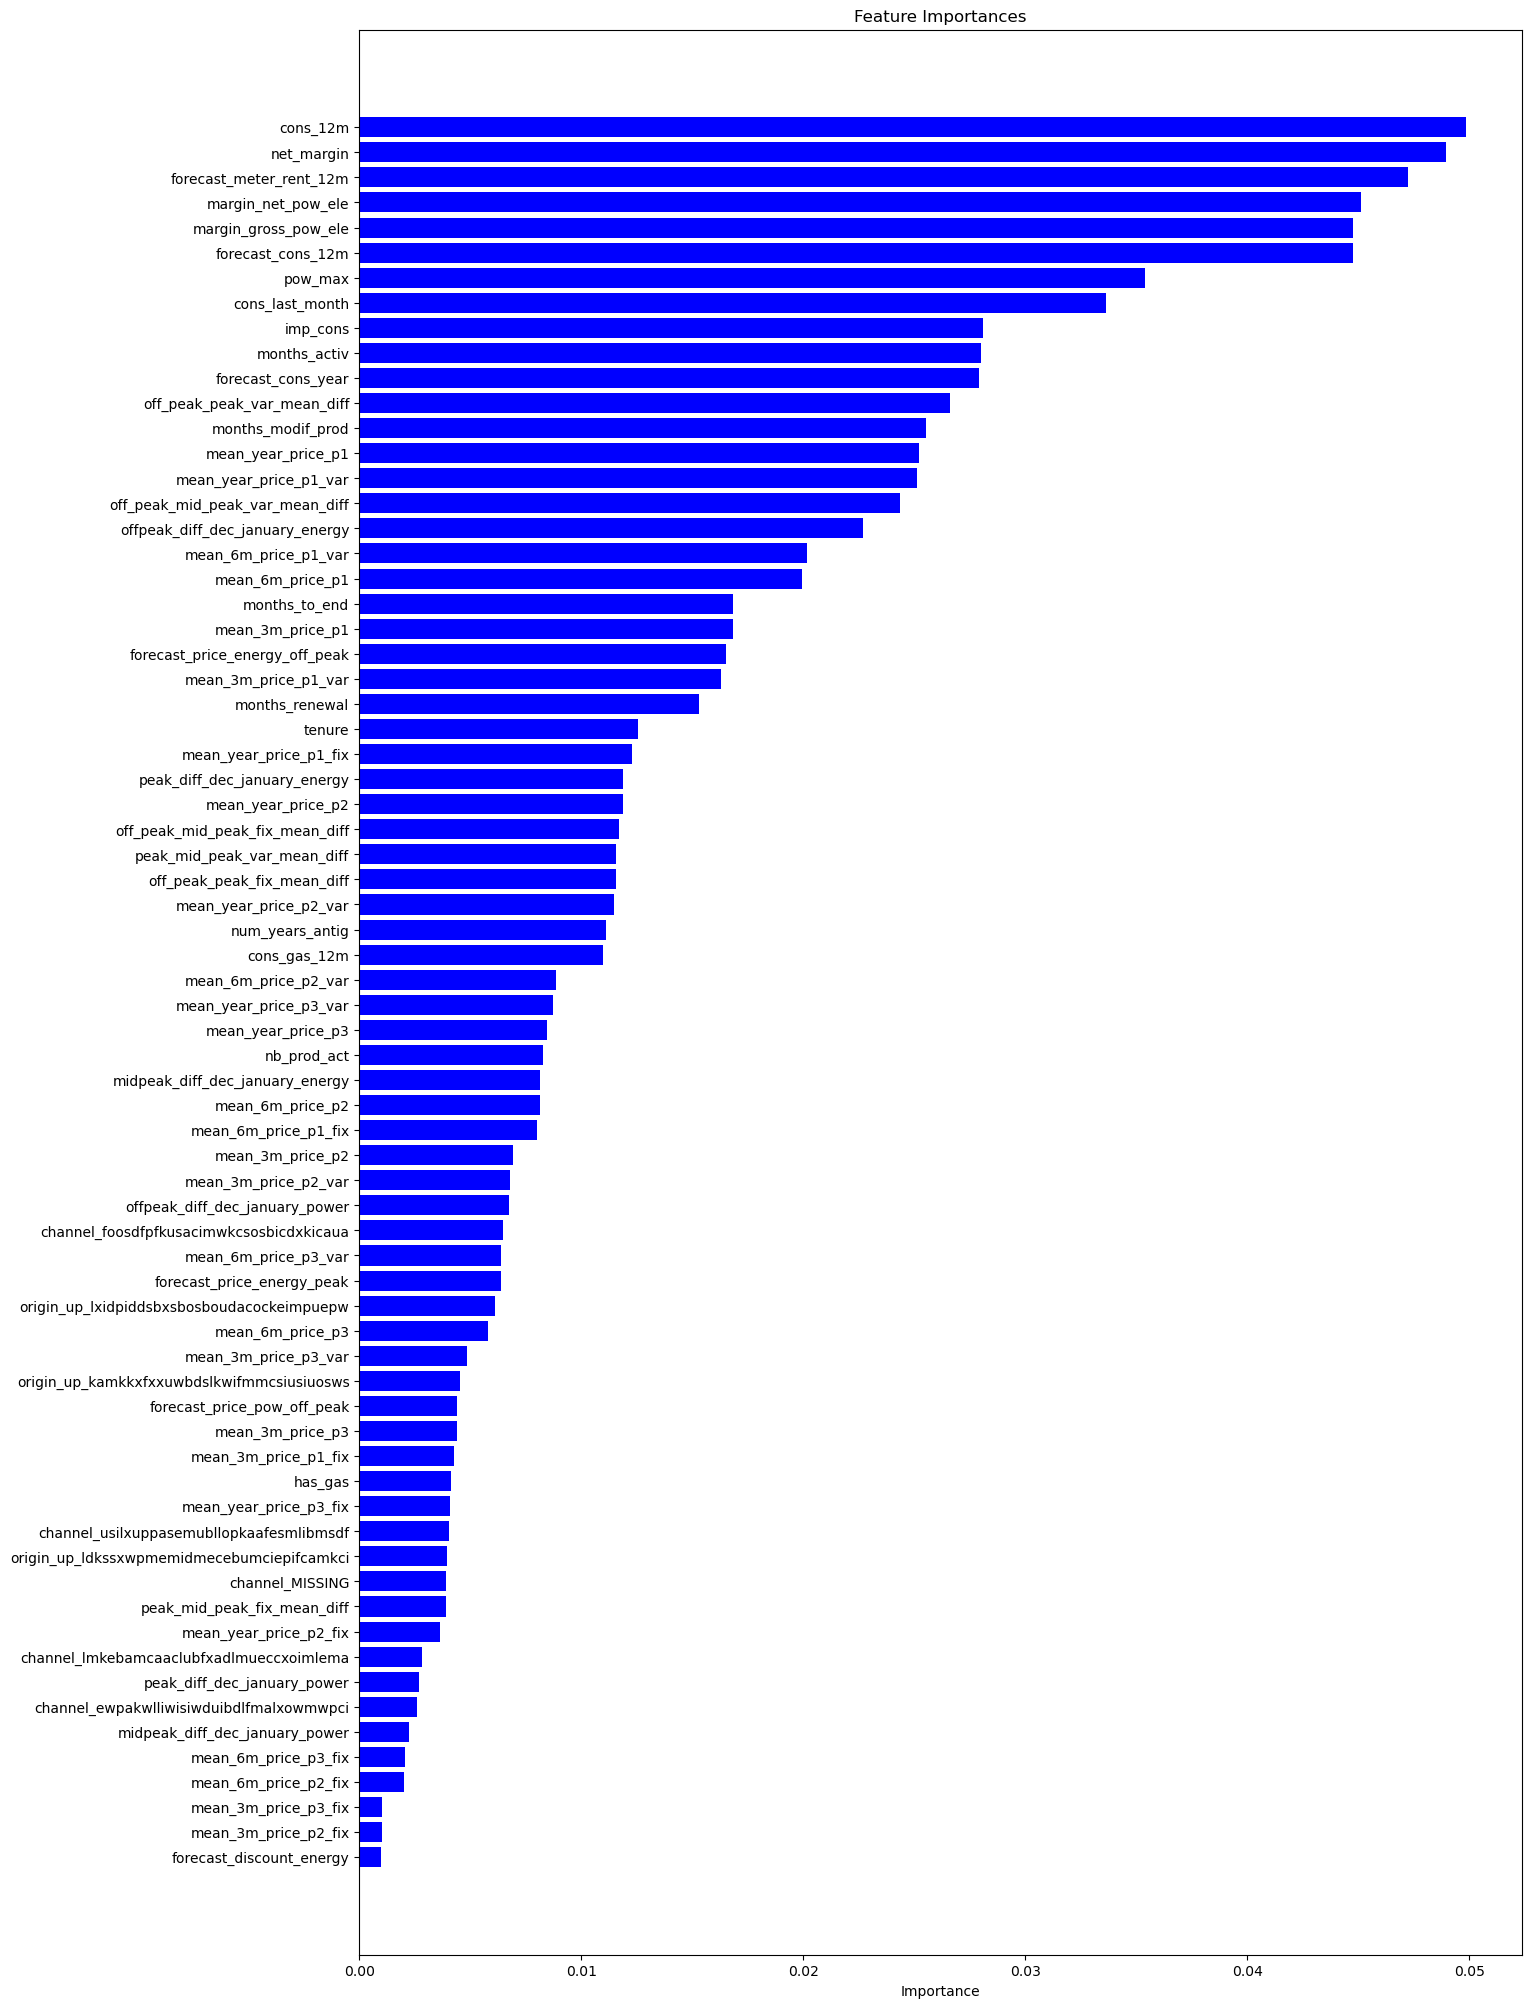

In [56]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

### Model on data after VIF 

In [57]:
X=df1.drop('churn',axis=1)
X.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  3.668479      0.000000         0.000000           2.280920   
2  2.736397      0.000000         0.000000           1.689841   
3  3.200029      0.000000         0.000000           2.382089   
4  3.646011      0.000000         2.721811           2.650065   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            0.000000                       0.0                 0.444045   
1            0.000000                       0.0                 1.237292   
2            0.000000                       0.0                 1.599009   
3            0.000000                       0.0                 1.318689   
4            2.721811                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  2               6   
1                    44.311378  ...                 76               4   
2                    44.311378  ...                 68               8   
3                    44.311378  ...                 69               9   
4                    40.606701  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 37 columns]

In [58]:
y=df1['churn']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=123)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11684, 37)
(2921, 37)
(11684,)
(2921,)


In [61]:
#standarization
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [62]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train_std, y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:
#metrics for train data
metrics.confusion_matrix(y_train, model.predict(X_train_std))

array([[10549,     0],
       [    0,  1135]], dtype=int64)

In [64]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, model.predict(X_train_std)).ravel()

In [65]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 1135
False positives: 0
True negatives: 10549
False negatives: 0



In [66]:
print(f"Accuracy: {metrics.accuracy_score(y_train, model.predict(X_train_std))}")
print(f"Precision: {metrics.precision_score(y_train, model.predict(X_train_std))}")
print(f"Recall: {metrics.recall_score(y_train, model.predict(X_train_std))}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [67]:
#metrics for test data
metrics.confusion_matrix(y_test, model.predict(X_test_std))

array([[2632,    5],
       [ 269,   15]], dtype=int64)

In [68]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, model.predict(X_test_std)).ravel()

In [69]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 15
False positives: 5
True negatives: 2632
False negatives: 269



In [70]:
print(f"Accuracy: {metrics.accuracy_score(y_test, model.predict(X_test_std))}")
print(f"Precision: {metrics.precision_score(y_test, model.predict(X_test_std))}")
print(f"Recall: {metrics.recall_score(y_test, model.predict(X_test_std))}")

Accuracy: 0.90619650804519
Precision: 0.75
Recall: 0.0528169014084507


In [71]:
y_test.value_counts()

0    2637
1     284
Name: churn, dtype: int64

In [72]:
#model understanding
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


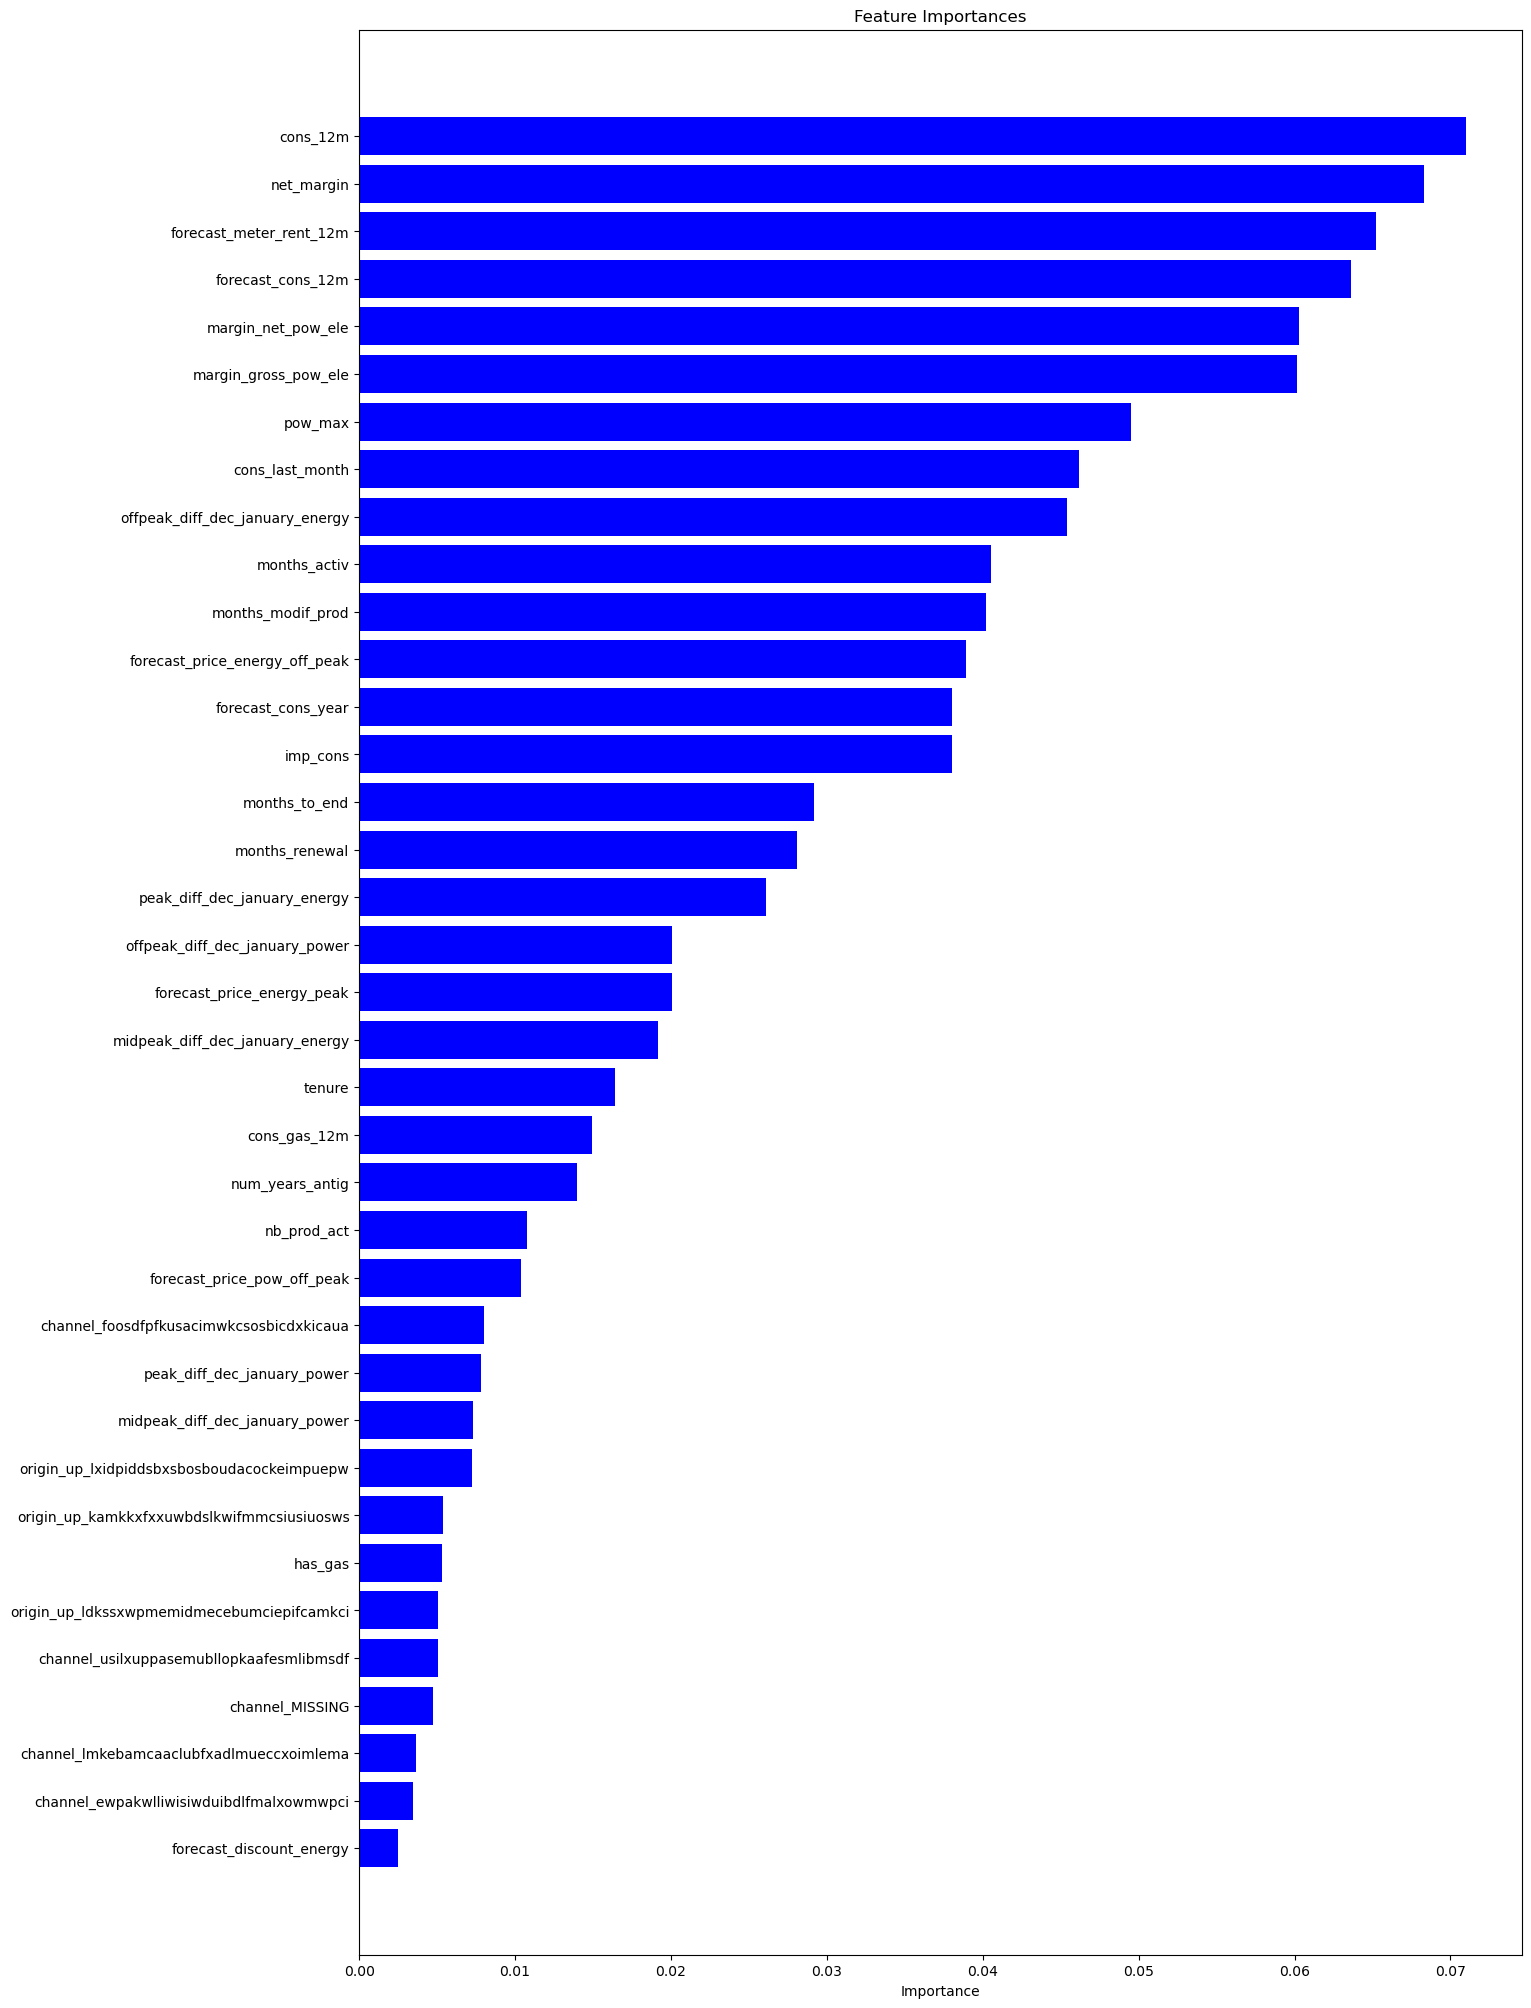

In [73]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- Some of the engineered features are in the top half in terms of how influential they are